In [2]:
import pandas as pd #pandas for dataframe operations
import numpy as np  #numpy for mathematical operations
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline

In [11]:
#reading the data
df = pd.read_csv('iris.data',names=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'])
df.sample(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
8,4.4,2.9,1.4,0.2,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
59,5.2,2.7,3.9,1.4,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor


In [13]:
#shape of data
df.shape

(150, 5)

In [12]:
#finding null values
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [14]:
#value count of unique items in class feature
df.value_counts('class')

class
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

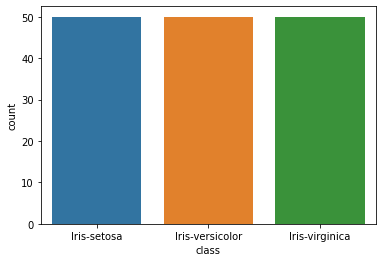

In [15]:
#visualizing the count
sns.countplot(df['class'])

In [16]:
#data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The independent features are in cm so feature scaling is not required in this dataset.


In [19]:
#Label encoding in categorical feature
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [22]:
df.sample(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
87,6.3,2.3,4.4,1.3,1
34,4.9,3.1,1.5,0.1,0
110,6.5,3.2,5.1,2.0,2
9,4.9,3.1,1.5,0.1,0
16,5.4,3.9,1.3,0.4,0


In [23]:
df.value_counts('class')

class
2    50
1    50
0    50
dtype: int64

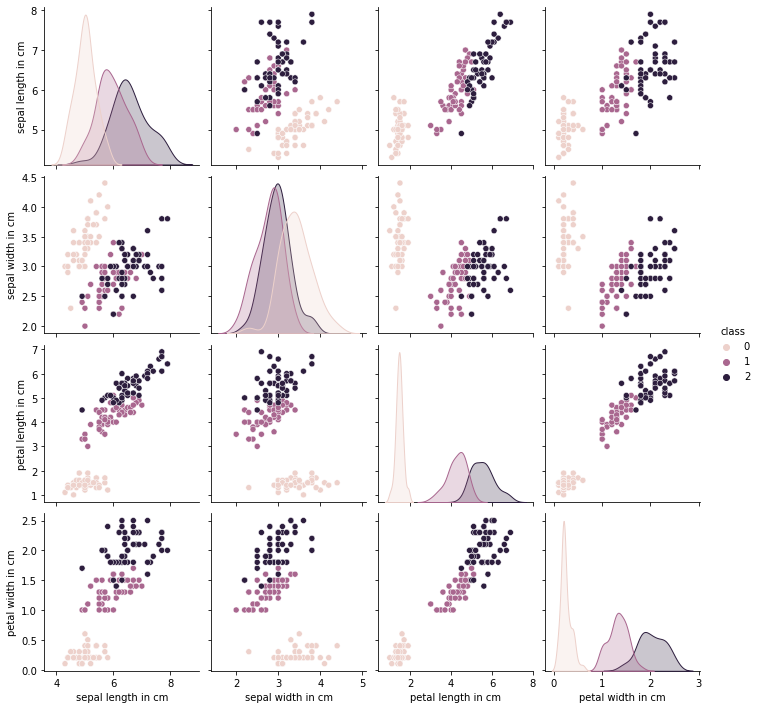

In [25]:
sns.pairplot(df, hue='class')

By seeing the pair plot we can say that, some data points are overlaped to each other. If the dataset is linearly seperable we can use the logistic regression. If the data points are fully overlapped then knn is the best(because euclidean distance is used here). If the data points are some how overlapped decision tree and ensemble techniques can be used.

In [28]:
#train test split 
from sklearn.model_selection import train_test_split

In [33]:
x = df.iloc[:,0:4]
y = df['class']

In [34]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 42)
print('xtrain :',xtrain.shape)
print('xtest :',xtest.shape)
print('ytrain :',ytrain.shape)
print('ytest :',ytest.shape)

xtrain : (112, 4)
xtest : (38, 4)
ytrain : (112,)
ytest : (38,)


In [36]:
#creating decision tree model
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()

In [38]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [40]:
ypred = dt.predict(xtest)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
confusion_matrix(ytest, ypred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [42]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [52]:
def classes(predict):
    if predict == 0:
        print('Iris-setosa')
    elif predict == 1:
        print('Iris-versicolor')
    else:
        print('Iris-virginica')

In [46]:
a=[[4.9, 3.1, 1.5, 0.1]]
b=[[6.5, 3.2, 5.1,2.0]]

In [48]:
print(dt.predict(a))
print(dt.predict(b))

[0]
[2]


In [57]:
classes(dt.predict(a))

Iris-setosa


In [58]:
classes(dt.predict(b))

Iris-virginica
